## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import statsmodels.api as sm
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
print(f"The number of rows is : {df.shape[0]}")

The number of rows is : 294478


c. The number of unique users in the dataset.

In [4]:
num_of_unique = df['user_id'].nunique()
print(f"The number of unique users is : {num_of_unique}")

The number of unique users is : 290584


d. The proportion of users converted.

In [5]:
po_conv = df.query("converted == 1")['user_id'].nunique() / df.shape[0] * 100
print(f"The proportion of users converted is : {round(po_conv,2)} %")

The proportion of users converted is : 11.94 %


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
times_not_lineup = df.query("(group == 'treatment' and landing_page != 'new_page') or (group != 'treatment' and landing_page == 'new_page')")['user_id'].count()
print(f"The number of times the `new_page` and `treatment` don't line up is : {times_not_lineup} ")

The number of times the `new_page` and `treatment` don't line up is : 3893 


f. Do any of the rows have missing values?

In [7]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

There are no any missing values in data

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
## Store data that new page and old page are line up in new data frame called df2
df2 = df.drop(df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page") or (group == "control" and landing_page != "old_page") or (group != "control" and landing_page == "old_page")').index)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
uniq = df2.user_id.nunique()
print(f"number of unique users is : {uniq} ")

number of unique users is : 290584 


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
df[df['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop_duplicates(subset=['user_id'], inplace = True)

In [14]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
conv = df2.query("converted == 1")['user_id'].nunique()
sample_space = df2.shape[0]
prop_conv = conv / sample_space * 100
print(f"Probability of an individual converting regardless of the page they receive is : {round(prop_conv,2)} %")

Probability of an individual converting regardless of the page they receive is : 11.96 %


b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
cont_conv = df2.query("converted == 1 and group == 'control'")['user_id'].nunique()
cont_sample_space = df2.query('group == "control"')['user_id'].nunique()
prop_cont_conv = cont_conv / cont_sample_space * 100
print(f"Probability of an control group converted is : {round(prop_cont_conv,2)} %")

Probability of an control group converted is : 12.04 %


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
tre_conv = df2.query("converted == 1 and group == 'treatment'")['user_id'].nunique()
tre_sample_space = df2.query('group == "control"')['user_id'].nunique()
prop_tre_conv = tre_conv / tre_sample_space * 100
print(f"Probability of an treatment group converted is : {round(prop_tre_conv,2)} %")

Probability of an treatment group converted is : 11.88 %


d. What is the probability that an individual received the new page?

In [18]:
new_p = df2.query("landing_page == 'new_page'")['user_id'].nunique()
sample_space = df2.shape[0]
prop_new_p = new_p / sample_space * 100
print(f"The probability that an individual received the new page is : {round(prop_new_p,2)} %")

The probability that an individual received the new page is : 50.01 %


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

    - The probability of an individuals converting regardless of the page they recived is 11.96%.
    - The probabilty of an individuals converting and they was in **control group** is 12.04%.
    - The probabilty of an individuals converting and they was in **treatment** group is 12.04%.
    
    They are pretty similer so there is no evidence that new page lead to more conversion.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

 
Null hypothese == H0: page_new - page_old <= 0  
Alternative hypothese == H1: page_new - page_old > 0 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
## Compute converted success rate, which is equals to the converted success rate regardless of page
page_new = df2.query("converted == 1")['user_id'].nunique() / df2['user_id'].nunique()
page_new = round(page_new, 5)
print(f"convert rate for page_new under the null is {page_new}")

convert rate for page_new under the null is 0.1196


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
## Compute converted success rate, which is equals to the converted success rate regardless of page
page_old = df2.query("converted == 1")['user_id'].nunique() / df2['user_id'].nunique()
page_old = round(page_old, 5)
print(f"convert rate for page_old under the null is {page_old}")

convert rate for page_old under the null is 0.1196


c. What is $n_{new}$?

In [21]:
#Compute the number of unique users who has new page
N_new = df2.query('landing_page == "new_page"')['user_id'].nunique()

print(f"the number of unique users who has new page is : {N_new}")

the number of unique users who has new page is : 145310


d. What is $n_{old}$?

In [22]:
#Compute the number of unique users who has old page
N_old = df2.query('landing_page == "old_page"')['user_id'].nunique()

print(f"the number of unique users who has old page is : {N_old}")

the number of unique users who has old page is : 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.choice([1,0], N_new, p=(page_new,1-page_new))
new_page_converted

array([1, 1, 0, ..., 0, 0, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.choice([1,0], N_old, p=(page_old,1-page_old))
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
diffs = new_page_converted.mean() - old_page_converted.mean()
diffs

0.001395105918218717

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
p_diffs = []
for _ in range(10000):
    sample = df2.sample(df2.shape[0], replace=True)
    new_page_converted = np.random.choice([1,0], N_new, p=(page_new,1-page_new))
    old_page_converted = np.random.choice([1,0], N_old, p=(page_old,1-page_old))
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [27]:
p_diffs = np.array(p_diffs)

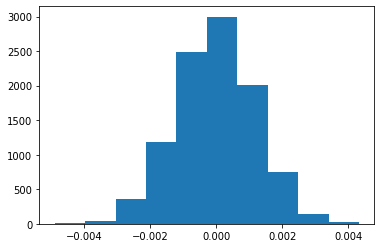

In [28]:
plt.hist(p_diffs)
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
## number of users with all new_page users and all new_page users
convert_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()
convert_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()
## actual converted rate
actual_cvt_new = float(convert_new)/ float(N_new) 
actual_cvt_old = float(convert_old)/ float(N_old)

In [30]:
## Compute observed difference in converted rate 
obs_diff = actual_cvt_new - actual_cvt_old
obs_diff

-0.0015782389853555567

In [31]:
null_val = np.random.normal(0, p_diffs.std(), p_diffs.size)

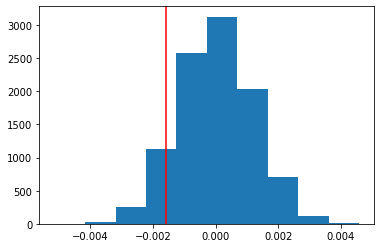

In [32]:
# #plot a histogram
plt.hist(null_val)
plt.axvline(x=obs_diff, c='r')

In [33]:
## proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**
(null_val > obs_diff).mean()

0.9102

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

Since p-value > alpha(0.05) We fail to reject the null hypothes.
with a type I error rate of 0.05, the old page has higher probablity of convert rate than new page 

p-value is the probability of obtaining results as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct. . A smaller p-value means that there is stronger evidence in favor of the alternative hypothesis.    ##Investopedia Defintion

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
import statsmodels.api as sm

## number of users with all new_page users and all new_page users
convert_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()
convert_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()
N_new = df2.query('landing_page == "new_page"')['user_id'].nunique()
N_old = df2.query('landing_page == "old_page"')['user_id'].nunique()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [35]:
count = np.array([convert_new, convert_old])
nobs = np.array([N_new, N_old])

In [36]:
zstat, pval = sm.stats.proportions_ztest(count, nobs, alternative = 'larger')
zstat, pval

(-1.3109241984234394, 0.9050583127590245)

In [37]:
norm.cdf(zstat)

0.09494168724097551

In [38]:
norm.ppf(1-(0.05/2))

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

since z_score is lower then critical value, we fail to reject the null hypothesis that old page has a higher probabilty of convert rate than new page

This result is the same as parts J. and K. result. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

The type of regression will be the logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [51]:
df2.head()

,user_id,timestamp,group,landing_page,converted,new_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


In [39]:
## Create dummy variables for pages
df2[['new_page','old_page']] = pd.get_dummies(df2['landing_page'])
df2.drop(['old_page'], axis=1, inplace=True)

In [40]:
df2['intercept'] = 1

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [41]:
x = df2[['intercept', 'new_page']]
y = df2['converted']

In [42]:
## Create Logistic Regression model 
lrm = sm.Logit(y, x)
res = lrm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [43]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:               8.077e-06
Time:                        15:02:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
new_page      -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

    - The p-value associated with new_page is 0.190 so there is no evidence to reject the null hypothesis
    - they have different explainory varibale or factor for the result.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

    - i suggest to improve the model and adds significant value add new variable (timestamp)  
    - Disadvantage -> more complex and need to add higher order term to help predict the result better

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [44]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [45]:
### Create the necessary dummy variables
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])
df_new.drop(['CA'], axis=1, inplace=True)

In [46]:
#Create new Logistic regression
lrm_new = sm.Logit(df_new['converted'], df_new[['intercept','new_page','UK','US']])
res2 = lrm_new.fit()
res2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:               2.323e-05
Time:                        15:02:03   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
new_page      -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [47]:
np.exp(res2.params)                              y = ax + b 

intercept    0.131332
new_page     0.985168
UK           1.051944
US           1.041599
dtype: float64

RESULTS :
For every unit for new_page increase, convert will decrease by 0.98, holding all other varible constant.

For every unit for UK increases, convert will decrease by 1.051, holding all other varible constant.

For every unit for US increases, convert will decrease by 1.041, holding all other varible constant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [48]:
## Create new intereacton column between new page and country US and UK
df_new['uk_new_page'] = df_new['new_page']*df_new['UK']
df_new['us_new_page'] = df_new['new_page']*df_new['US']

In [49]:
#Create new Logistic regression
lrm_new_3 = sm.Logit(df_new['converted'], df_new[['intercept','new_page','UK','US','uk_new_page','us_new_page']])
res3 = lrm_new_3.fit()
res3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:               3.482e-05
Time:                        15:02:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -2.0040      0.036    -55.008      0.000      -2.075      -1.933
new_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK              0.0118      0.040      0.296      0.767      -0.066       0.090
US              0.0175      0.038      0.465      0.642      -0.056       0.091
uk_new_page     0.0783      0.057      1.378      0.168      -0.033       0.190
us_new_page     0.0469      0.054      0.872      0.383      -0.059       0.152
===============================================================================
"""

In [50]:
np.exp(res3.params)

intercept      0.134794
new_page       0.934776
UK             1.011854
US             1.017682
uk_new_page    1.081428
us_new_page    1.048001
dtype: float64

<a id='conclusions'></a>
## Conclusions

Most variables in the summary are not statistically significant.

intercept p-value is less than 0.05, which is statistically significant

For every unit for new_page increase, convert will decrease by 0.934, holding all other varible constant.

For every unit for UK increase, convert will icrease by 1.011, holding all other varible constant.

For every unit for US increase, convert will icrease by  1.017, holding all other varible constant.

For every unit for uk_new_page increase, convert will icrease by 1.081428, holding all other varible constant.

For every unit for us_new_page increase, convert will icrease by  1.048013, holding all other varible constant.

